In [145]:
import numpy as np
import pandas as pd

In [146]:
df=pd.read_csv('spam.csv')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2588,ham,My superior telling that friday is leave for a...,NaN,NaN,NaN
1977,spam,Reply to win å£100 weekly! Where will the 2006...,NaN,NaN,NaN
2862,ham,"Ok that would b lovely, if u r sure. Think abo...",NaN,NaN,NaN
515,ham,S:)no competition for him.,NaN,NaN,NaN
1352,ham,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...,NaN,NaN,NaN


## 1.DATA CLEANING

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [148]:
#drop last three columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [149]:
df.sample(5)

,v1,v2
5146,ham,Oh unintentionally not bad timing. Great. Fing...
4302,ham,Yup i'm free...
4686,ham,Eatin my lunch...
635,ham,Me n him so funny...
4449,ham,"Awesome, be there in a minute"


In [150]:
#renaming the columns
df.rename(columns={"v1":"TARGET","v2":"TEXT"},inplace=True)

In [151]:
df.sample(5)

,TARGET,TEXT
3693,ham,Ok im not sure what time i finish tomorrow but...
374,spam,"Thanks for your Ringtone Order, Reference T91...."
4353,spam,important information 4 orange user 0789xxxxxx...
670,ham,Ho ho - big belly laugh! See ya tomo
5090,ham,"St andre, virgil's cream"


In [152]:
#giving labels to target column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [153]:
df["TARGET"]=encoder.fit_transform(df["TARGET"])

In [154]:
df.sample(5)

,TARGET,TEXT
2161,0,Is she replying. Has boye changed his phone nu...
835,0,Good Morning my Dear........... Have a great &...
4809,0,"Honey, can you pls find out how much they sell..."
2193,0,I called but no one pick up e phone. I ask bot...
1401,0,Kaiez... Enjoy ur tuition... Gee... Thk e seco...


In [155]:
#checking for missing values
df.isnull().sum()

TARGET    0
TEXT      0
dtype: int64

In [156]:
df.duplicated().sum()

414

In [157]:
df.shape

(5572, 2)

In [158]:
df.drop_duplicates(keep="first",inplace=True)

In [159]:
df.duplicated().sum()

0

In [160]:
df.shape

(5158, 2)

## 2. EXPLORATIVE DATA ANALYSIS

In [161]:
#number of hams and number of spams
df["TARGET"].value_counts()

0    4516
1     642
Name: TARGET, dtype: int64

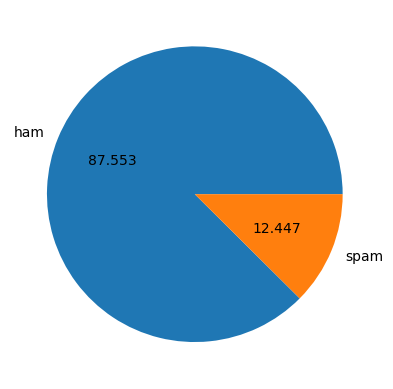

In [162]:
import matplotlib.pyplot as plt
plt.pie(df["TARGET"].value_counts(),labels=["ham","spam"],autopct="%0.3f")
plt.show()

In [163]:
import nltk

In [164]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dongarisrikashyap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [165]:
#number of charcters
df["num_characters"]=df["TEXT"].apply(len)

In [166]:
df.sample(5)

,TARGET,TEXT,num_characters
2654,0,Its sarcasm.. .nt scarcasim,27
2203,0,soon you will have the real thing princess! Do...,65
5515,0,You are a great role model. You are giving so ...,245
823,1,25p 4 alfie Moon's Children in need song on ur...,161
798,0,Ok i msg u b4 i leave my house.,31


In [167]:
#number of words
df["num_words"]=df["TEXT"].apply(lambda x:len(nltk.word_tokenize(x)))

In [168]:
df.sample(5)

,TARGET,TEXT,num_characters,num_words
1588,0,At 4. Let's go to bill millers,30,9
4284,0,I pocked you up there before,28,6
2212,0,This is one of the days you have a billion cla...,58,14
3450,0,Yes we were outside for like 2 hours. And I ca...,107,25
1696,0,"Sorry man, my stash ran dry last night and I c...",76,18


In [169]:
#number of sentences
df["num_sentences"]=df["TEXT"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [170]:
df.sample(5)

,TARGET,TEXT,num_characters,num_words,num_sentences
686,0,Every King Was Once A Crying Baby And Every Gr...,143,32,2
1190,0,We're done...,13,4,1
4213,0,Ard 530 like dat lor. We juz meet in mrt stati...,77,20,2
3981,0,His frens go then he in lor. Not alone wif my ...,60,17,2
2716,0,"House-Maid is the murderer, coz the man was mu...",166,35,1


In [171]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5158.000000,5158.000000,5158.000000
mean,78.806708,18.430399,1.962195
std,58.187284,13.326907,1.445515
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [172]:
#ham
df[df["TARGET"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.449734,17.123782,1.820195
std,56.352902,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [173]:
#spam
df[df["TARGET"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,642.00000,642.000000,642.000000
mean,137.59190,27.621495,2.961059
std,30.29638,7.048863,1.477880
min,13.00000,2.000000,1.000000
25%,131.25000,25.000000,2.000000
50%,148.00000,29.000000,3.000000
75%,157.00000,32.000000,4.000000
max,224.00000,46.000000,9.000000


In [174]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

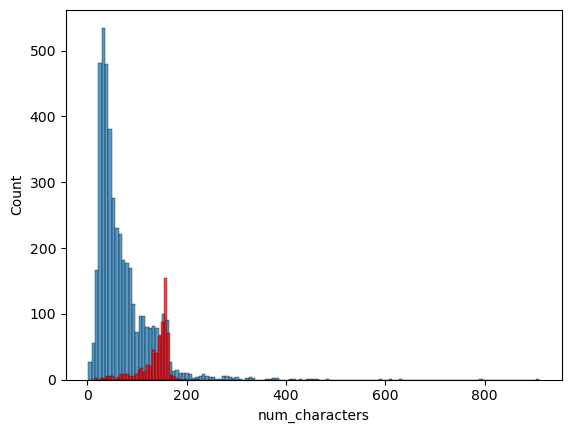

In [175]:
sns.histplot(df[df["TARGET"]==0]["num_characters"])
sns.histplot(df[df["TARGET"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

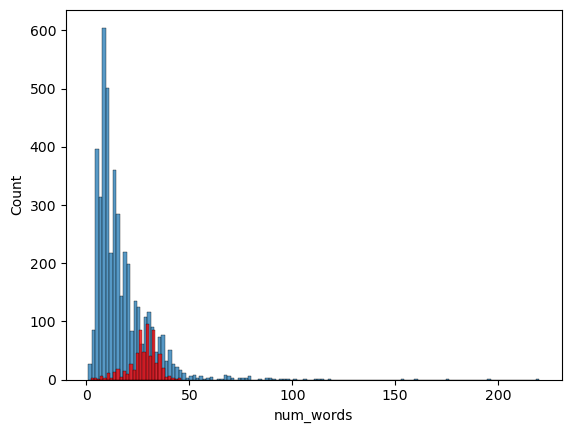

In [176]:
sns.histplot(df[df["TARGET"]==0]["num_words"])
sns.histplot(df[df["TARGET"]==1]["num_words"],color="red")

/var/folders/01/6l702ltx5rv3gyxw0z7dh4yc0000gn/T/ipykernel_1439/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

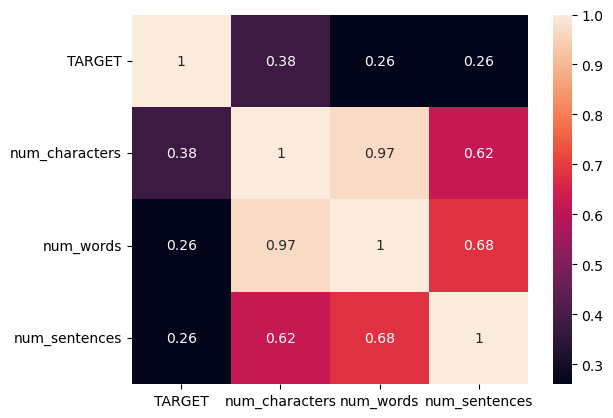

In [177]:
sns.heatmap(df.corr(),annot=True)

## 3. DATA PREPROCESSING 

In [178]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    
    
            
    

In [179]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dongarisrikashyap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [180]:
from nltk.corpus import stopwords

In [181]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [182]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [183]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [184]:
df["TRANSFORMED_TEXT"]=df["TEXT"].apply(transform_text)

In [185]:
df.sample(5)

,TARGET,TEXT,num_characters,num_words,num_sentences,TRANSFORMED_TEXT
3633,0,Its a big difference. &lt;#&gt; versus &lt;...,73,29,2,big differ lt gt versu lt gt everi lt gt hr
890,0,Why do you ask princess?,24,6,1,ask princess
5123,0,"Hi Chikku, send some nice msgs",30,7,1,hi chikku send nice msg
2533,0,Glad it went well :) come over at 11 then we'l...,95,23,1,glad went well come 11 plenti time clair goe work
5372,0,"Ok., is any problem to u frm him? Wats matter?",46,13,2,problem u frm wat matter


In [186]:
spam_corpus = []
for msg in df[df['TARGET'] == 1]['TRANSFORMED_TEXT'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [187]:
len(spam_corpus)

9765

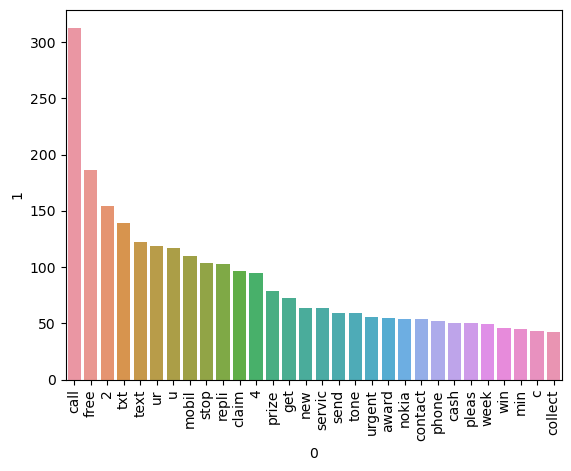

In [188]:
#in spam
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [189]:
ham_corpus = []
for msg in df[df['TARGET'] == 0]['TRANSFORMED_TEXT'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [190]:
len(ham_corpus)

35404

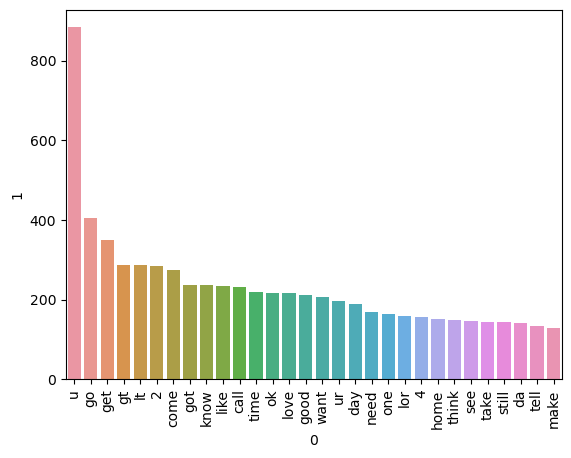

In [191]:
#in ham
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

## 4. MODEL BUILDING


In [192]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [193]:
X = tfidf.fit_transform(df['TRANSFORMED_TEXT']).toarray()

In [194]:
y = df['TARGET'].values

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [197]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [198]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [199]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.872093023255814
[[789 114]
 [ 18 111]]
0.49333333333333335


In [200]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757751937984496
[[902   1]
 [ 24 105]]
0.9905660377358491


In [201]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9806201550387597
[[901   2]
 [ 18 111]]
0.9823008849557522


In [202]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))